# Principal Component Analysis (PCA) Notebook

## Objective
Perform Principal Component Analysis on the Ratings.csv dataset with columns B1, B2, B3, B4, and B5.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load the dataset
df = pd.read_csv('Ratings.csv')

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Display descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   B1      7 non-null      int64
 1   B2      7 non-null      int64
 2   B3      7 non-null      int64
 3   B4      7 non-null      int64
 4   B5      7 non-null      int64
dtypes: int64(5)
memory usage: 412.0 bytes
None

Descriptive Statistics:
             B1        B2        B3        B4        B5
count  7.000000  7.000000  7.000000  7.000000  7.000000
mean   3.285714  2.285714  3.142857  3.142857  3.142857
std    1.380131  1.380131  1.214986  1.772811  1.214986
min    1.000000  0.000000  1.000000  0.000000  2.000000
25%    2.500000  1.500000  2.500000  2.500000  2.000000
50%    4.000000  3.000000  4.000000  3.000000  3.000000
75%    4.000000  3.000000  4.000000  4.500000  4.000000
max    5.000000  4.000000  4.000000  5.000000  5.000000


In [3]:
# Separate features
features = ['B1', 'B2', 'B3', 'B4', 'B5']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained Variance Calculation
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Cumulative Explained Variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
print("\nCumulative Explained Variance Ratio:")
print(cumulative_variance_ratio)

Explained Variance Ratio:
[5.92796465e-01 1.63738263e-01 1.61138433e-01 8.21840061e-02
 1.42831615e-04]

Cumulative Explained Variance Ratio:
[0.59279647 0.75653473 0.91767316 0.99985717 1.        ]


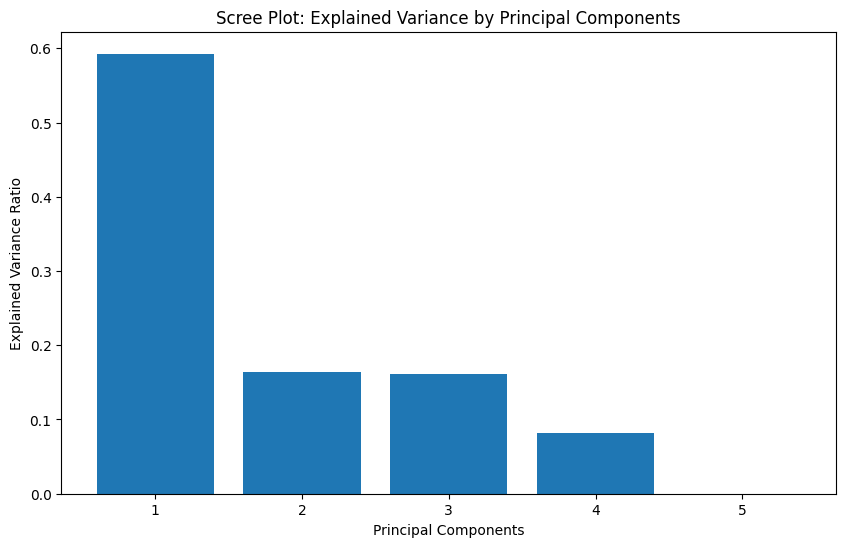

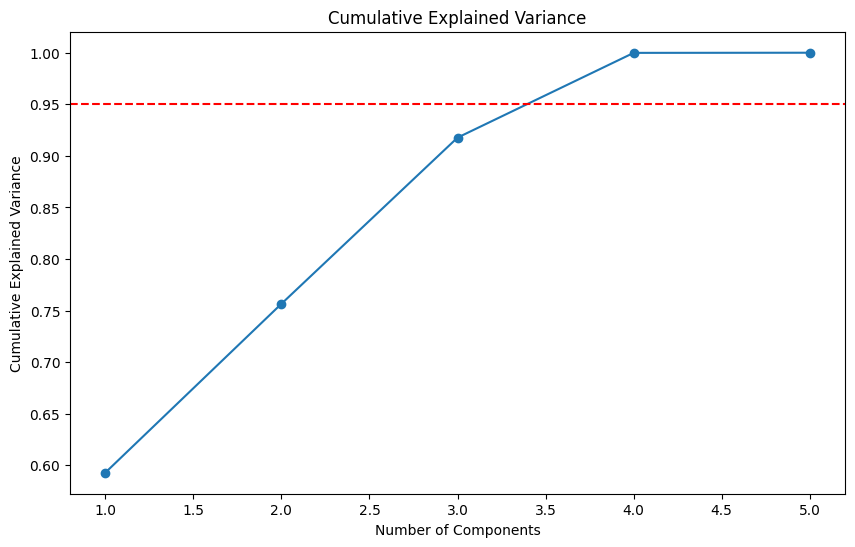

In [5]:
# Visualization of Explained Variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot: Explained Variance by Principal Components')
plt.show()

# Cumulative Explained Variance Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

In [6]:
# Component Loadings
component_loadings = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(len(features))], 
    index=features
)
print("Component Loadings:")
print(component_loadings)

Component Loadings:
         PC1       PC2       PC3       PC4       PC5
B1 -0.327460  0.764344 -0.479576  0.212456 -0.182805
B2 -0.489825  0.092462  0.508484 -0.422392 -0.560848
B3  0.456636  0.412498 -0.063540 -0.763245  0.186410
B4 -0.566251  0.105825  0.209154 -0.107808  0.782811
B5 -0.351688 -0.475263 -0.680932 -0.426945 -0.067011


## Interpretation of Results

1. **Explained Variance**: Shows the proportion of variance explained by each principal component.
2. **Cumulative Explained Variance**: Indicates how much total variance is captured by the components.
3. **Component Loadings**: Reveal the contribution of original features to each principal component.